# FLAML to tune parameters
MSc in Statistical Science\
University of Oxford\
Group-assessed practical\
HT 2024


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, zero_one_loss, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Load dataset

In [2]:
# Load the training data and the test inputs
X_train = pd.read_csv('X_train.csv', index_col = 0, header=[0, 1, 2]) # inputs of the training set
y_train = pd.read_csv('y_train.csv', index_col=0).squeeze('columns').to_numpy() # outputs of the training set
X_test = pd.read_csv('X_test.csv', index_col = 0, header=[0, 1, 2]) # inputs of the test set

In [14]:
# X_train is a 6,000 * 518 dataframe. 
# Entries (i,j) correspond to the j'th dimension of the observation i
X_train


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
Id                                                                         
0            -0.266585 -0.984668 -0.729823 -0.895122  2.138628  0.935209   
1            -0.180061  0.260884 -0.069373  0.208734 -0.078855 -0.577818   
2            -0.692900  0.356662  0.062617  0.248280  3.470037  0.166613   
3             0.243339  0.214182 -0.049026  1.456255 -0.360826 -0.875256   
4            -0.968576  0.309255  0.223164  0.160960  0.919838 -0.111985   
...                ...       ...       ...       ...       ...       ...   
5995          0.503490 -0.540720 -0.690117 -0.107338 -0.647856 -0.681969   
5996         -0.600597  0.406386 -0.748409 -0.316157 -0.507428 -0.054214   
5997         -1.014298 -0.950744  0.618304  0.204298 -0.788411 -0.794254   
5998         -0.002938  0.646034 -0.732819  1.205990 -0.898733 -0.684953   
5999         -0.881917 -0.615638  0.891155  4.850262 -0.349280 -1.010980   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
Id                                                  ...                       
0           0.104089 -0.698659 -0.736408 -0.334376  ...  0.065003  0.016522   
1           0.583788  0.143781  0.291556  0.007314  ...  0.087692  0.016355   
2           0.823874  0.181112  0.551939  0.357985  ...  0.132387  0.025847   
3          -0.770200  0.315500  0.789956  0.448319  ...  0.071478  0.019166   
4          -1.012521 -0.665692 -0.316646 -0.264381  ...  0.106220  0.023536   
...              ...       ...       ...       ...  ...       ...       ...   
5995       -0.246245 -0.546552  0.062783  0.070393  ...  0.084929  0.017250   
5996       -0.476804 -0.373120 -0.930158 -1.080690  ...  0.075407  0.014998   
5997       -0.586847  0.099172 -0.313476 -0.523417  ...  0.138591  0.024969   
5998        0.134642 -0.374792 -0.019524 -1.016032  ...  0.137695  0.030371   
5999       -0.577905 -0.046604 -0.828026 -0.457468  ...  0.175120  0.039703   

feature                      zcr                                          \
statistics              kurtosis       max      mean    median       min   
number            06          01        01        01        01        01   
Id                                                                         
0           0.015776    5.743597  0.307617  0.051370  0.042480  0.002441   
1           0.016605   64.870987  0.812988  0.082784  0.069824  0.003906   
2           0.023922   34.251705  0.850098  0.058200  0.036621  0.010254   
3           0.025535    1.364990  0.342285  0.081713  0.075195  0.000000   
4           0.019742    3.589230  0.322266  0.073736  0.069336  0.004395   
...              ...         ...       ...       ...       ...       ...   
5995        0.020335    4.868783  0.668945  0.076452  0.044434  0.001465   
5996        0.020683    7.893681  0.584961  0.076210  0.048340  0.000000   
5997        0.023658   27.257378  0.373047  0.042598  0.037598  0.000000   
5998        0.029970  431.200500  0.384277  0.025731  0.025391  0.008301   
5999        0.025094   13.567758  0.233398  0.047689  0.044922  0.015625   

feature                          
statistics       skew       std  
number             01        01  
Id                               
0            1.976972  0.034533  
1            7.374503  0.074870  
2            5.927942  0.117603  
3            1.100437  0.041754  
4            1.210593  0.036459  
...               ...       ...  
5995         2.045856  0.084214  
5996         2.561808  0.073010  
5997         3.778109  0.027813  
5998        10.260160  0.006870  
5999         2.553229  0.018049  

[6000 rows x 518 colu

In [39]:
X_train.shape

(6000, 518)

In [4]:
#y_train contains the true class:  Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock
y_train

array(['Electronic', 'Rock', 'Instrumental', ..., 'Pop', 'Instrumental',
       'Instrumental'], dtype=object)

In [5]:
# X_test is the array of test inputs, of the same format as X_train. The objective is to predict the class (Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock) of the output
X_test

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
Id                                                                         
0             3.974762  4.354650  3.394523  0.033462  5.611623  2.592655   
1             0.033636 -0.139950  0.678688 -0.553824 -0.165293  0.370275   
2             0.044094  4.285359  0.977213  3.240997  0.400350  1.026224   
3            -0.425218  0.793007  0.509624 -0.967103 -1.432252 -0.900761   
4            -1.120238 -0.503659  0.303515 -0.596549 -0.716761 -0.874363   
...                ...       ...       ...       ...       ...       ...   
1995         -0.166039 -0.660406 -0.955245 -0.689303 -0.916851 -0.136661   
1996          2.010343  0.344572  2.738141  1.238262  2.815471  0.689118   
1997         -0.869148 -0.600280  0.105814  0.553810 -0.839182 -0.706434   
1998         -0.854251 -0.804227  1.347275 -0.748155 -0.408385 -0.909165   
1999          0.929528  0.922116  1.074849  0.431512  0.040441 -0.361733   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
Id                                                  ...                       
0           3.041094  2.815378  3.954026  2.365586  ...  0.052970  0.013487   
1          -0.314710 -0.368706 -0.437181 -0.441662  ...  0.093105  0.022865   
2           0.772464  0.807625  1.942534  1.938970  ...  0.081955  0.017371   
3          -0.501279 -0.855886 -0.556825  7.404243  ...  0.098877  0.019089   
4          -0.708101 -0.642351 -0.327327 -0.342220  ...  0.102545  0.023823   
...              ...       ...       ...       ...  ...       ...       ...   
1995       -0.367279 -1.135291 -1.174082 -0.609749  ...  0.060857  0.022777   
1996        4.040531  2.749969  2.658481  4.763800  ...  0.050589  0.015169   
1997       -0.360566  0.053638 -0.791513 -0.669329  ...  0.079556  0.025229   
1998       -0.870467 -0.077660 -0.538250 -0.108390  ...  0.147899  0.023989   
1999        0.371801  0.470401 -0.566806  0.082485  ...  0.119940  0.023605   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
Id                                                                        
0           0.022031  70.844788  0.671387  0.035129  0.026367  0.010254   
1           0.028800  18.427612  0.538574  0.055975  0.039062  0.000000   
2           0.016673  38.401405  0.405762  0.030685  0.028809  0.002930   
3           0.016183   4.129582  0.252441  0.037955  0.024902  0.000000   
4           0.025166  16.758356  0.380371  0.027851  0.019043  0.000000   
...              ...        ...       ...       ...       ...       ...   
1995        0.017722   8.467750  0.444824  0.055770  0.039062  0.001465   
1996        0.013096  -0.649581  0.357422  0.126850  0.120117  0.000000   
1997        0.026858   1.563682  0.152344  0.039138  0.035156  0.002441   
1998        0.027429  22.050222  0.319824  0.032715  0.028809  0.000000   
1999        0.024036   2.444547  0.256836  0.047209  0.041016  0.002441   

feature                         
statistics      skew       std  
number            01        01  
Id                              
0           8.394708  0.067026  
1           3.638194  0.053879  
2           2.620369  0.016835  
3           1.898847  0.034382  
4           3.244483  0.027128  
...              ...       ...  
1995        2.520271  0.056601  
1996        0.234551  0.055476  
1997        1.084503  0.020284  
1998        3.429668  0.022654  
1999        1.266626  0.030202  

[2000 rows x 518 columns]

In [3]:
column_names_list = list(X_train.columns)
print(column_names_list)

#mean_columns = [column for column in column_names_list if column[1] == 'mean']
#var_columns = [column for column in column_names_list if column[1] == 'std']

[('chroma_cens', 'kurtosis', '01'), ('chroma_cens', 'kurtosis', '02'), ('chroma_cens', 'kurtosis', '03'), ('chroma_cens', 'kurtosis', '04'), ('chroma_cens', 'kurtosis', '05'), ('chroma_cens', 'kurtosis', '06'), ('chroma_cens', 'kurtosis', '07'), ('chroma_cens', 'kurtosis', '08'), ('chroma_cens', 'kurtosis', '09'), ('chroma_cens', 'kurtosis', '10'), ('chroma_cens', 'kurtosis', '11'), ('chroma_cens', 'kurtosis', '12'), ('chroma_cens', 'max', '01'), ('chroma_cens', 'max', '02'), ('chroma_cens', 'max', '03'), ('chroma_cens', 'max', '04'), ('chroma_cens', 'max', '05'), ('chroma_cens', 'max', '06'), ('chroma_cens', 'max', '07'), ('chroma_cens', 'max', '08'), ('chroma_cens', 'max', '09'), ('chroma_cens', 'max', '10'), ('chroma_cens', 'max', '11'), ('chroma_cens', 'max', '12'), ('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean', '02'), ('chroma_cens', 'mean', '03'), ('chroma_cens', 'mean', '04'), ('chroma_cens', 'mean', '05'), ('chroma_cens', 'mean', '06'), ('chroma_cens', 'mean', '07'), ('

In [4]:
heatmap_columns = [column for column in column_names_list if column[2] == '01' and column[1] == 'mean']
X_heatmap = X_train[heatmap_columns]

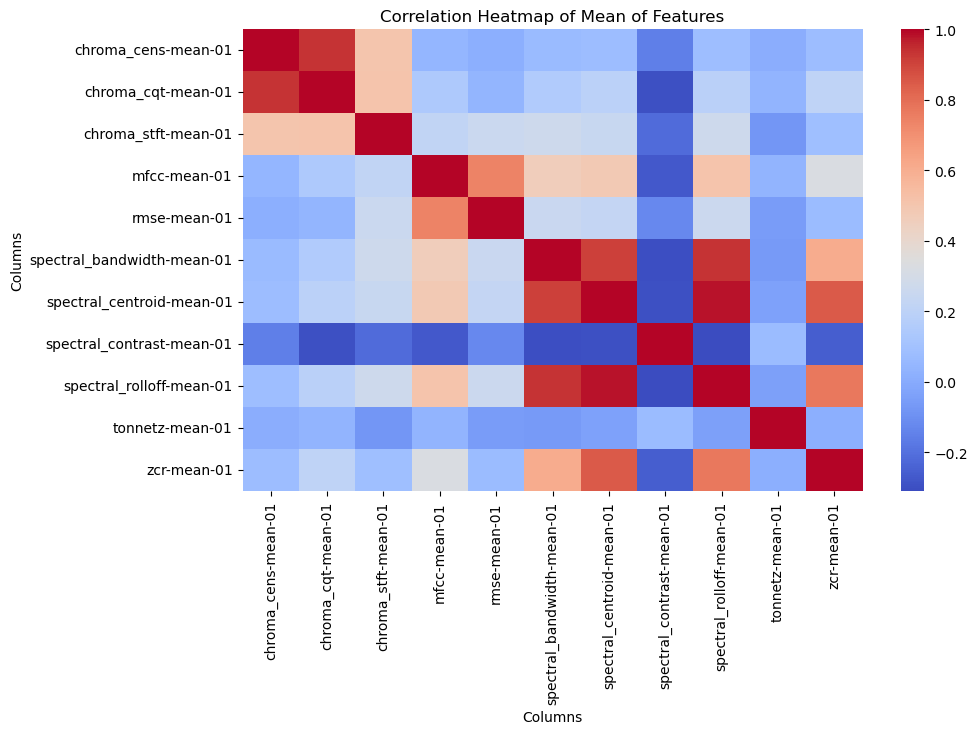

In [7]:
corr_matrix = X_heatmap.corr()

# Create the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mean of Features')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

# The heatmap displays the pairwise correlation coefficients between selected features from the training dataset. 
# Features were chosen for frequency or chroma 01 and their attribute being 'mean'.

In [9]:
heatmap_01_columns = [column for column in column_names_list if column[2] == '01']
X_01_heatmap = X_train[heatmap_01_columns]

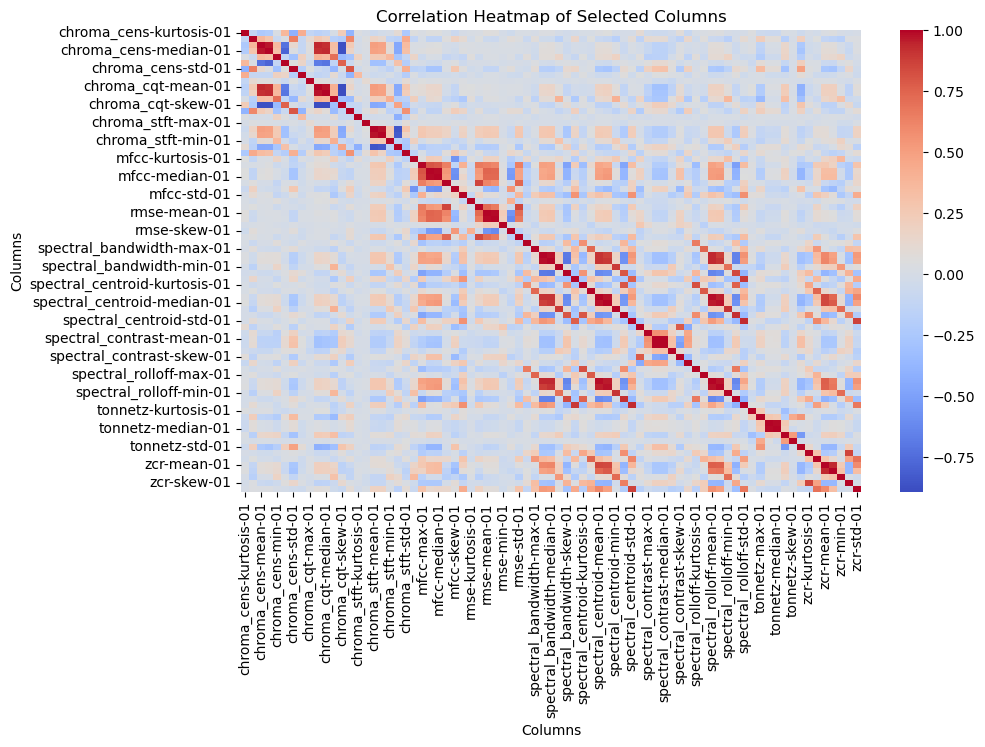

In [10]:
corr_matrix = X_01_heatmap.corr()

# Create the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

In [9]:
heatmap_full_columns = [column for column in column_names_list if column[1] == 'mean']
X_full_heatmap = X_train[heatmap_full_columns]

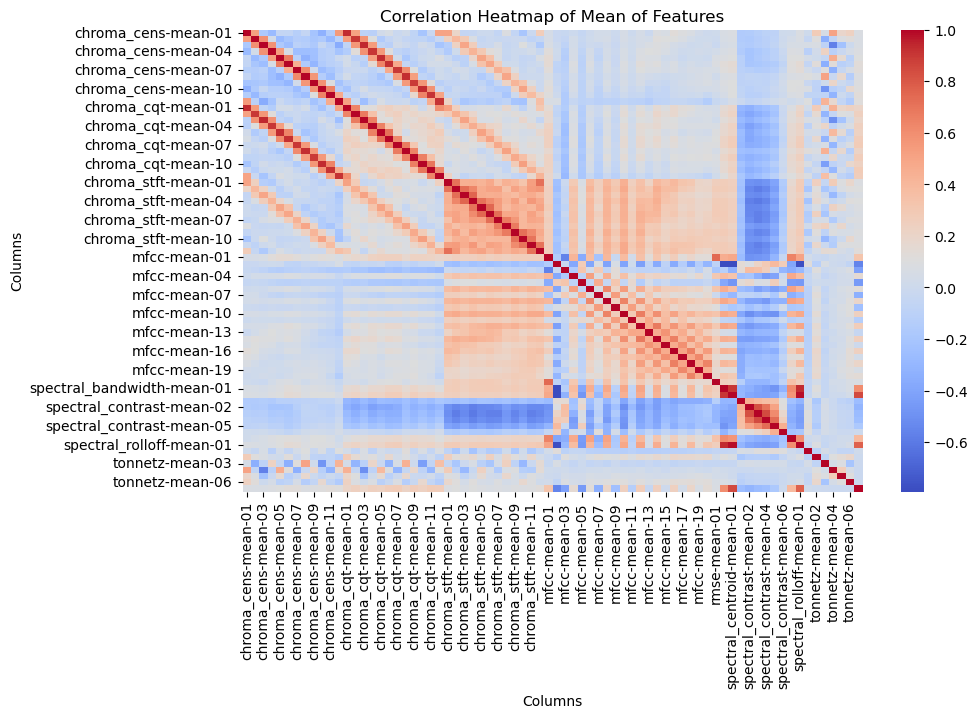

In [10]:
corr_matrix = X_full_heatmap.corr()

# Create the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mean of Features')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

# The heatmap displays the pairwise correlation coefficients between selected features from the training dataset. 
# Means for all features are selected.